In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [64]:
# Question 1
# Download the daily data (from 17/03/2022 to 
# 17/03/2023) for the S&P 500ETF (SPY) from Yahoo Finance by using yfinance package. 
# Get the spot priceof the Index

data = yf.download('SPY', start='2022-03-17', end='2023-03-18')

[*********************100%***********************]  1 of 1 completed


In [65]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-17,433.589996,441.070007,433.190002,441.070007,432.378418,102676900
2022-03-18,438.000000,444.859985,437.220001,444.519989,437.114197,106345500
2022-03-21,444.339996,446.459991,440.679993,444.390015,436.986359,88349800
2022-03-22,445.859985,450.579987,445.859985,449.589996,442.099701,74650400
2022-03-23,446.910004,448.489990,443.709991,443.799988,436.406189,79426100


In [66]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,381.809998,390.390015,380.649994,385.359985,383.894836,157790000
2023-03-14,390.500000,393.450012,387.049988,391.730011,390.240662,149752400
2023-03-15,385.890015,389.489990,383.709991,389.279999,387.799957,172996900
2023-03-16,386.820007,396.470001,386.290009,396.109985,394.603973,143254200
2023-03-17,393.220001,394.399994,388.549988,389.989990,389.989990,140047400


In [67]:
S = data['Adj Close'][-1]
print('The spot price is $', round(S,2))

The spot price is $ 389.99


In [68]:
# Question 2
# Calibrate the annualised volatility of the SPY. Compare it with the VIX data.

log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [69]:
vol = np.sqrt(252) * log_return.std() 
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 23.4 %


In [88]:
VIX = yf.download("^VIX", start="2022-03-17", end="2023-03-18")

[*********************100%***********************]  1 of 1 completed


In [89]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 25.51 %


In [90]:
# Question 3
# Find the call and put option price with Strike at 400 and Expiry date on 14/04/2023

def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [91]:
K = 400 # Bestemt pris
T = 3/52 # Beregnes ut i fra om det er uker/måneder
r = 0.0338 # Må sjekkes opp på Google for å finne oppdatert interest rate

In [92]:
call = euro_option_bs(S, K, T, r, vol, 'call')
print('The BS call price is $', round(call, 2))

The BS call price is $ 4.99


In [93]:
put = euro_option_bs(S, K, T, r, vol, 'put')
print('The BS put price is $', round(put, 2))

The BS put price is $ 14.22


In [94]:
# Question 4
# Compare the value with the market price.

SP500 = yf.Ticker('SPY')

In [95]:
opt = SP500.option_chain('2023-04-14')
call1 = opt.calls.lastPrice[opt.calls.strike == K]
print('The Market call price is $', float(call1.values))

The Market call price is $ 4.77


In [96]:
put1 = opt.puts.lastPrice[opt.puts.strike == K]
print('The Market put price is $', float(put1.values))

The Market put price is $ 12.5


In [97]:
# Question 5
# If we use the VIX as volatility, what is the results for Q3 and Q4? 
# Which oneis closer to the market price?

call2 = euro_option_bs(S, K, T, r, vix*0.01, 'call')
print('The BS call price is $', round(call2,2))

The BS call price is $ 5.72


In [98]:
put2 = euro_option_bs(S, K, T, r, vix*0.01, 'put')
print('The BS put price is $', round(put2,2))

The BS put price is $ 14.95


In [99]:
# Question 6
# Set the Strike from $375 to $425 (every $10), and Time
# is one week, twoweeks, one month, two months, one quarter, half year and one year. 
# Set volatility equals to the VIX value. Plot the call price 3D surface

K = np.linspace(375,425,6)
T = [1/52, 2/52, 1/12, 2/12, 1/4, 1/2, 1]

In [100]:
call = np.zeros((len(T),len(K)))
for i in range(len(T)):
    for j in range(len(K)):
        call[i,j] = euro_option_bs(S, K[j], T[i], r, vix*0.01, 'call')

In [101]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

strike, ttm = np.meshgrid(K, T)

/var/folders/ld/6dz5k2qx3t7bb6dmg2c3pf6c0000gn/T/ipykernel_24898/2376249277.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


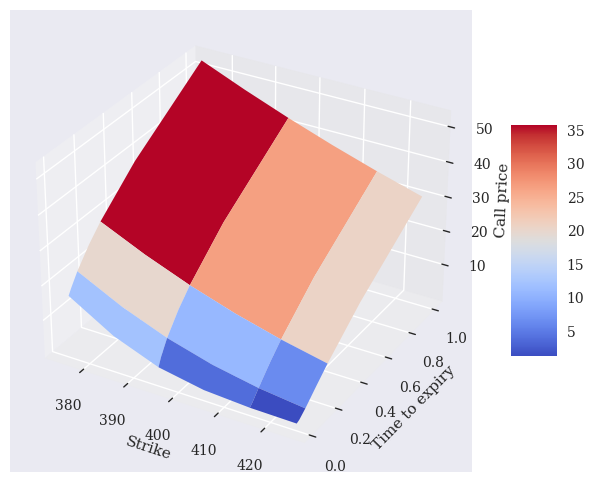

In [102]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, call, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike')
ax.set_ylabel('Time to expiry')
ax.set_zlabel('Call price')
fig.colorbar(surf, shrink=0.5, aspect=5);